## Apartado ML

DESCRIPTIVE/ANALYTICAL ANALYSIS

In [4]:
# prompt: LEER CSV E IMPORTA TODAS LA LIBRERIAS NECESARIAS SI ME QUIERO ENFOCAR EN PANDAS PARA EL CLEANING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import country_converter as coco
import matplotlib.pyplot as plt
import re
import hashlib
from urllib.parse import urlparse

# Check if the file is in your current directory, or provide the full path
df = pd.read_csv('C:/Users/sarad/Desktop/processed_data.csv') # Replace 'your_file.csv' with the actual file name
print("File loaded successfully!")

File loaded successfully!


In [5]:
df.head()

,data_source_link_url,description,estimated_cost,victims,impacts,references,year,month,day,IT,...,America,Asia,Europe,Not Found,Oceania,Threat source title,Threat source link URL,Threat source Categorized,industries_grouped,cost_category
0,icsstrive.com,ALPS' North American production operations and...,8000000.0,Corporation/Group,"IT, OT",[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,1,...,0,1,0,0,0,BlackByte,icsstrive.com,Other,Manufacturing,High
1,icsstrive.com,"San Francisco, California-based Framework, the...",30000000.0,Other,IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,1,...,1,0,0,0,0,NaN,NaN,Other,Technology,Very High
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...",8000000.0,Corporation,IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,1,...,1,0,0,0,0,NaN,NaN,Other,Manufacturing,High
3,icsstrive.com,Toyota Financial Services (TFS) is warning cus...,8000000.0,Other,"IT, Privacy",[{'title': 'Toyota warns customers of data bre...,2023,12,11,1,...,0,0,1,0,0,NaN,NaN,Other,Manufacturing,High
4,icsstrive.com,Chinese hackers are positioning themselves ins...,10000.0,Other,IT,[{'title': 'Chinese hackers allegedly target U...,2023,12,11,1,...,1,0,0,0,0,Volt Typhoon,icsstrive.com,Other,Energy and Utilities,Low


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("\nStatistics for numeric columns:")
print(df.describe())


Statistics for numeric columns:
       estimated_cost         year        month          day           IT  \
count    1.058000e+03  1058.000000  1058.000000  1058.000000  1058.000000   
mean     7.954053e+06  2018.810019     5.253308    12.817580     0.966919   
std      2.695399e+07     6.945034     3.779409     9.816374     0.178933   
min      1.300000e+00  1982.000000     1.000000     1.000000     0.000000   
25%      3.500000e+02  2020.000000     1.000000     2.000000     1.000000   
50%      1.000000e+06  2022.000000     5.000000    12.000000     1.000000   
75%      8.000000e+06  2023.000000     9.000000    21.000000     1.000000   
max      6.150000e+08  2024.000000    12.000000    31.000000     1.000000   

                OT      Privacy  malware_title_encoded       Africa  \
count  1058.000000  1058.000000                 1058.0  1058.000000   
mean      0.163516     0.056711                    0.0     0.013233   
std       0.370011     0.231399                    0.0     0

In [7]:
# Información del DataFrame (tipo de datos, valores no nulos)
print("\nDataFrame information:")
print(df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data_source_link_url       1058 non-null   object 
 1   description                1058 non-null   object 
 2   estimated_cost             1058 non-null   float64
 3   victims                    845 non-null    object 
 4   impacts                    1058 non-null   object 
 5   references                 1058 non-null   object 
 6   year                       1058 non-null   int64  
 7   month                      1058 non-null   int64  
 8   day                        1058 non-null   int64  
 9   IT                         1058 non-null   int64  
 10  OT                         1058 non-null   int64  
 11  Privacy                    1058 non-null   int64  
 12  malware_url                228 non-null    object 
 13  malware_title_grouped   

In [8]:
# Contar la cantidad de valores únicos por columna
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
data_source_link_url           1
description                  860
estimated_cost                59
victims                        6
impacts                        7
references                   820
year                          35
month                         12
day                           31
IT                             2
OT                             2
Privacy                        2
malware_url                    1
malware_title_grouped          1
malware_title_encoded          1
continents                     6
Africa                         2
America                        2
Asia                           2
Europe                         2
Not Found                      2
Oceania                        2
Threat source title           96
Threat source link URL         3
Threat source Categorized      2
industries_grouped             8
cost_category                  4
dtype: int64


In [9]:

# Calcular la media de la columna 'estimated_cost', ignorando los NaN
mean_value = df['estimated_cost'].mean()

# Rellenar los valores NaN con la media calculada
df['estimated_cost'] = df['estimated_cost'].fillna(mean_value)

# Calcular estadísticas descriptivas después de rellenar los NaN
print("\nEstadísticas descriptivas para el costo estimado (NaN rellenados con la media):")
print(df['estimated_cost'].describe())

print("\nAnálisis de frecuencias para columnas categóricas:")
categorical_columns = ['description', 'impacts', 'malware_title_grouped', 'continents',
                       'Threat source title Categorized', 'industries_grouped', 'cost_category']

for column in categorical_columns:
    if column in df.columns:
        print(f"\nFrecuencias de la columna '{column}':")
        print(df[column].value_counts())

# Análisis específico de la columna 'estimated_cost'
if 'estimated_cost' in df.columns:
    print("\nEstadísticas descriptivas para 'estimated_cost' (considerando NaN):")
    if df['estimated_cost'].notnull().sum() > 0:  # Verificar si tiene valores no nulos
        mean_value = df['estimated_cost'].mean()
        print(f"- Media: {mean_value}")
        print(f"- Mediana: {df['estimated_cost'].median()}")
        print(f"- Desviación estándar: {df['estimated_cost'].std()}")
    else:
        print("La columna 'estimated_cost' no contiene valores válidos (solo NaN).")


Estadísticas descriptivas para el costo estimado (NaN rellenados con la media):
count    1.058000e+03
mean     7.954053e+06
std      2.695399e+07
min      1.300000e+00
25%      3.500000e+02
50%      1.000000e+06
75%      8.000000e+06
max      6.150000e+08
Name: estimated_cost, dtype: float64

Análisis de frecuencias para columnas categóricas:

Frecuencias de la columna 'description':
WIZARD SPIDER is a sophisticated eCrime group that has been operating the Ryuk ransomware since August 2018, targeting large organizations for a high-ransom return. This methodology, known as “big game hunting,” signals a shift in operations for WIZARD SPIDER. This actor is a Russia-based criminal group known for the operation of the TrickBot banking malware that had focused primarily on wire fraud in the past.                                                                                                                                                                                                      

In [ ]:
# Análisis de las columnas booleanas o binarias (como IT, OT, Privacy)
binary_columns = ['IT', 'OT', 'Privacy', 'Africa', 'America', 'Asia', 'Europe', 'Oceania', 'Not Found']
print("\nBinary columns analysis:")
for column in binary_columns:
    if column in df.columns:
        print(f"\nColumn frequency'{column}':")
        print(df[column].value_counts())

# Análisis por continente
if 'continents' in df.columns:
    print("\nIncidents pero continent frequency:")
    print(df['continents'].value_counts())

# Análisis temporal (Year, Month, Day)
if {'year', 'month', 'day'}.issubset(df.columns):
    print("\nTemporal analysis:")
    print(f"- Unique years: {df['year'].unique()}")
    print(f"- Frequency per year:\n{df['year'].value_counts()}")
    print(f"- Frecuencia por mes:\n{df['month'].value_counts()}")
    print(f"- Frecuencia por día:\n{df['day'].value_counts()}")


Análisis de columnas binarias:

Frecuencias de la columna 'IT':
1    1023
0      35
Name: IT, dtype: int64

Frecuencias de la columna 'OT':
0    885
1    173
Name: OT, dtype: int64

Frecuencias de la columna 'Privacy':
0    998
1     60
Name: Privacy, dtype: int64

Frecuencias de la columna 'Africa':
0    1044
1      14
Name: Africa, dtype: int64

Frecuencias de la columna 'America':
0    597
1    461
Name: America, dtype: int64

Frecuencias de la columna 'Asia':
0    931
1    127
Name: Asia, dtype: int64

Frecuencias de la columna 'Europe':
0    716
1    342
Name: Europe, dtype: int64

Frecuencias de la columna 'Oceania':
0    1016
1      42
Name: Oceania, dtype: int64

Frecuencias de la columna 'Not Found':
0    986
1     72
Name: Not Found, dtype: int64

Frecuencias de incidentes por continente:
America      461
Europe       342
Asia         127
Not Found     72
Oceania       42
Africa        14
Name: continents, dtype: int64

Análisis temporal:
- Años únicos: [2023 2024 2022 2021 

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\1095143832.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


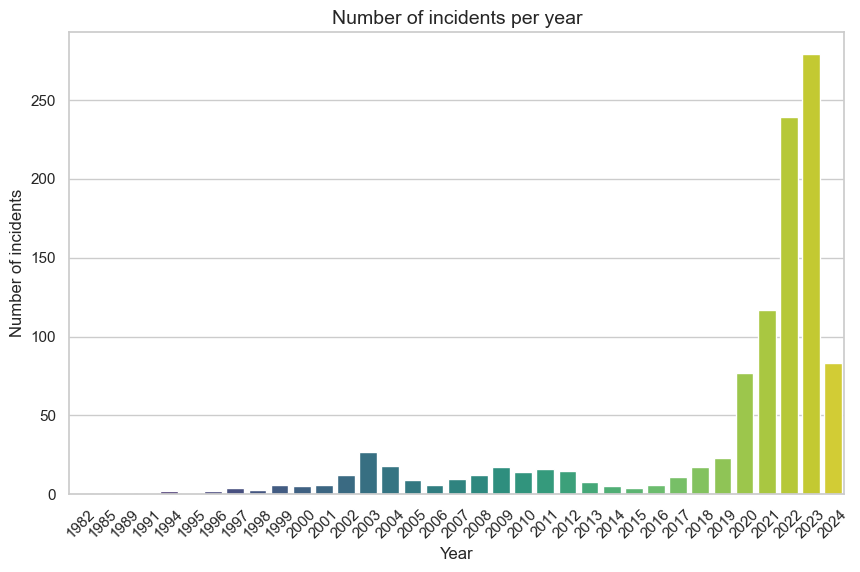

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\1095143832.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='coolwarm')


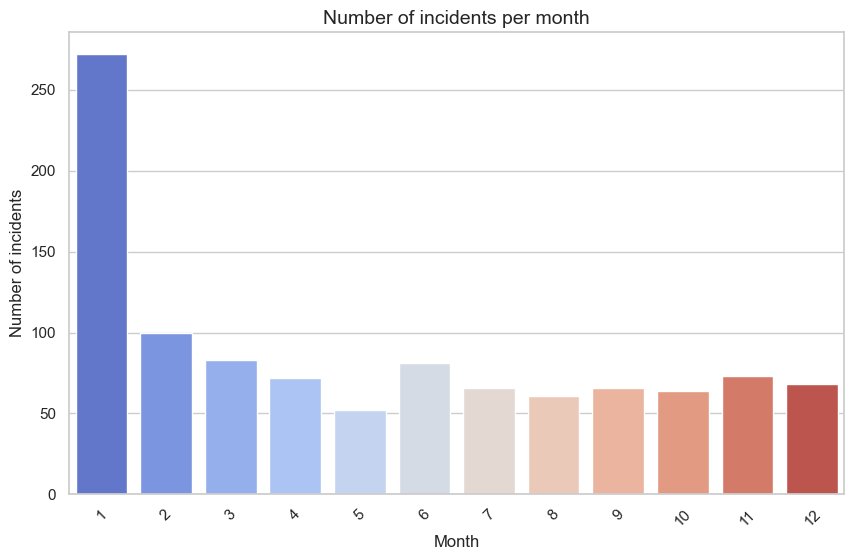

In [11]:
# Estilo de gráficos
sns.set(style="whitegrid")

# Análisis temporal: Tendencia de incidentes por año
if 'year' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='year', data=df, palette='viridis')
    plt.title('Number of incidents per year', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Number of incidents')
    plt.xticks(rotation=45)
    plt.show()

if 'month' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month', data=df, palette='coolwarm')
    plt.title('Number of incidents per month', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Number of incidents')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\4073579058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='continents', data=df, palette='Set2', order=df['continents'].value_counts().index)


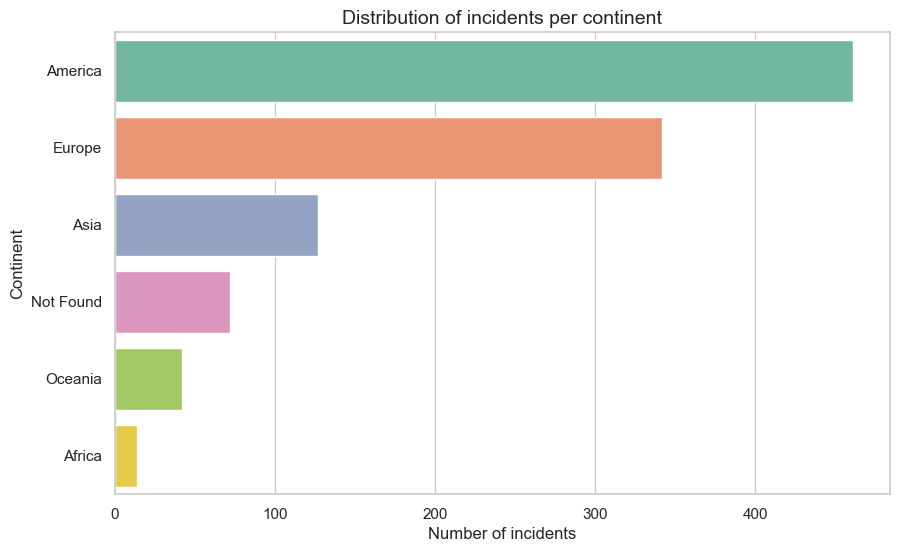

In [12]:
# Distribución por continente
if 'continents' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='continents', data=df, palette='Set2', order=df['continents'].value_counts().index)
    plt.title('Distribution of incidents per continent', fontsize=14)
    plt.xlabel('Number of incidents')
    plt.ylabel('Continent')
    plt.show()

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\3534613462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='husl')


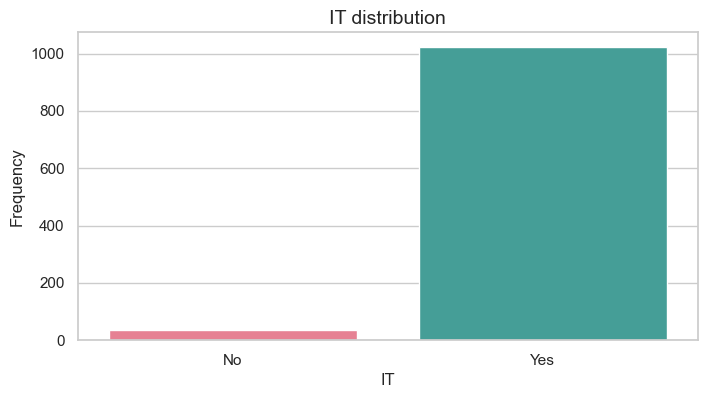

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\3534613462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='husl')


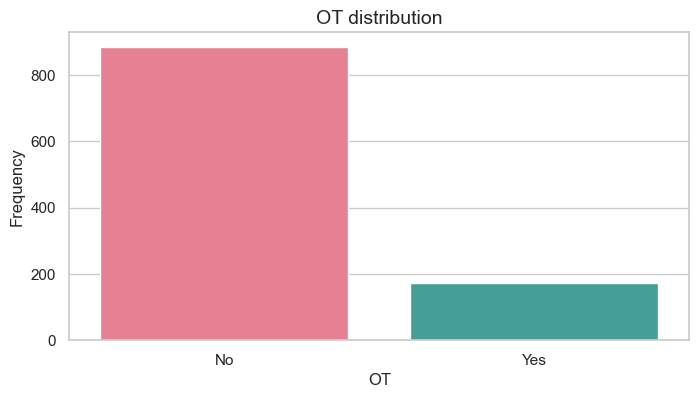

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\3534613462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='husl')


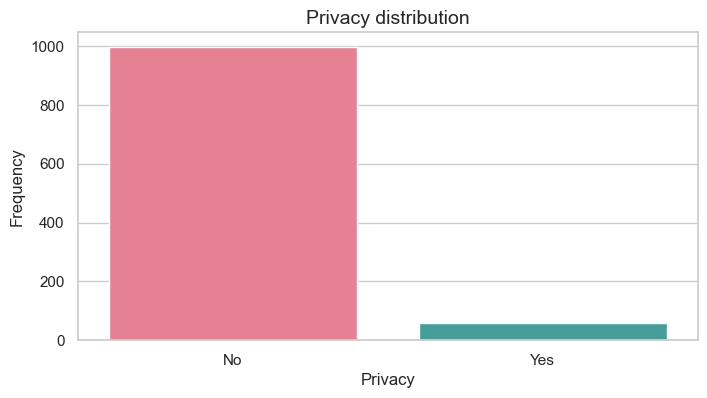

In [13]:
# Distribución de columnas binarias (IT, OT, Privacy)
binary_columns = ['IT', 'OT', 'Privacy']
for column in binary_columns:
    if column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=column, data=df, palette='husl')
        plt.title(f'{column} distribution', fontsize=14)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()

C:\Users\sarad\AppData\Local\Temp\ipykernel_25868\4011567557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='industries_grouped', data=df, palette='cool',


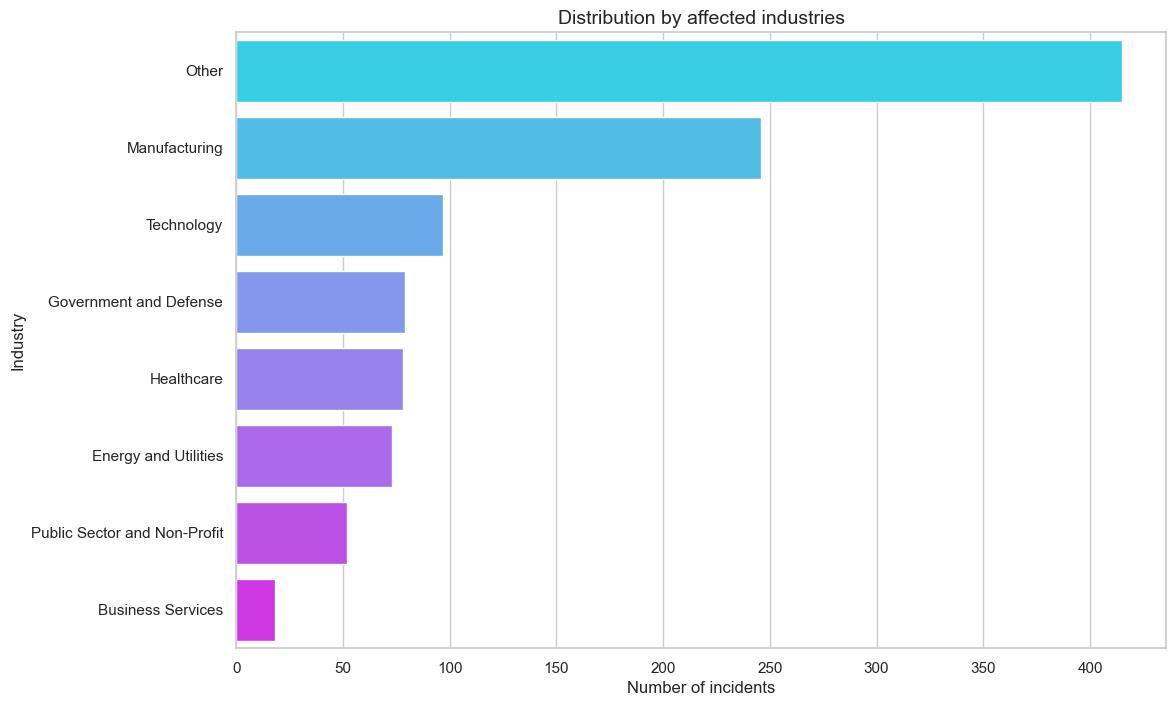

In [14]:
# Distribución de industrias afectadas
if 'industries_grouped' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(y='industries_grouped', data=df, palette='cool',
                  order=df['industries_grouped'].value_counts().index)
    plt.title('Distribution by affected industries', fontsize=14)
    plt.xlabel('Number of incidents')
    plt.ylabel('Industry')
    plt.show()

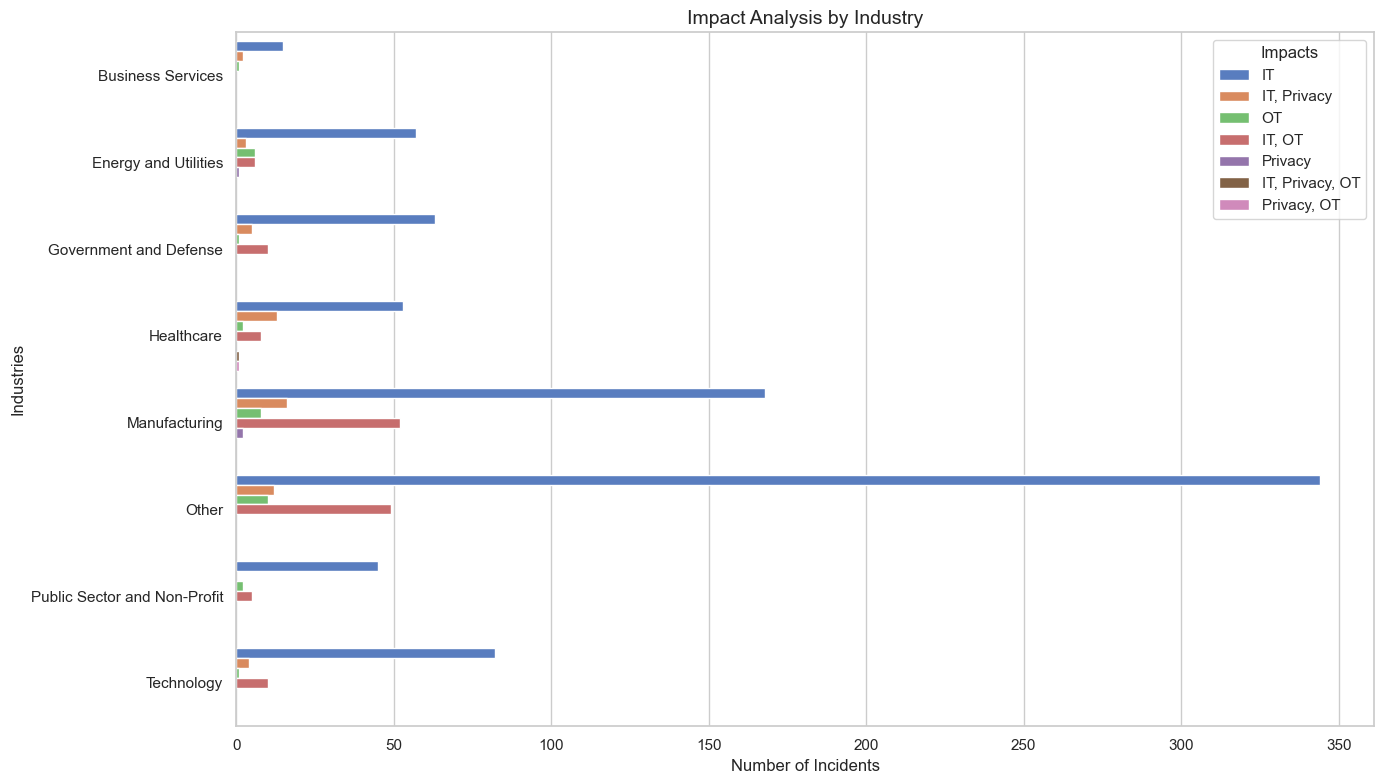

In [15]:

# Count impacts grouped by industries
impact_data = df.groupby(['industries_grouped', 'impacts']).size().reset_index(name='count')

# Visualize top industries and their impacts
top_industries = impact_data['industries_grouped'].value_counts().head(10).index
impact_data = impact_data[impact_data['industries_grouped'].isin(top_industries)]

plt.figure(figsize=(14, 8))
sns.barplot(data=impact_data, x='count', y='industries_grouped', hue='impacts', palette='muted')
plt.title('Impact Analysis by Industry', fontsize=14)
plt.xlabel('Number of Incidents')
plt.ylabel('Industries')
plt.legend(title='Impacts')
plt.tight_layout()
plt.show()

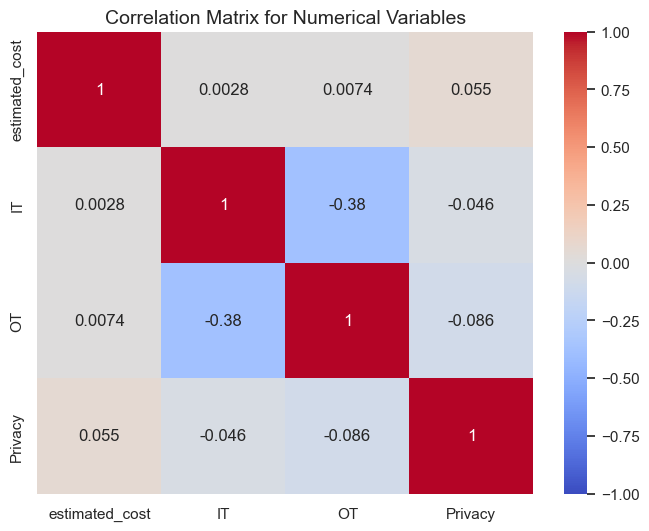

In [16]:

# Compute the correlation matrix for numerical columns
numerical_columns = ['estimated_cost', 'IT', 'OT', 'Privacy']
corr_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Variables', fontsize=14)
plt.show()

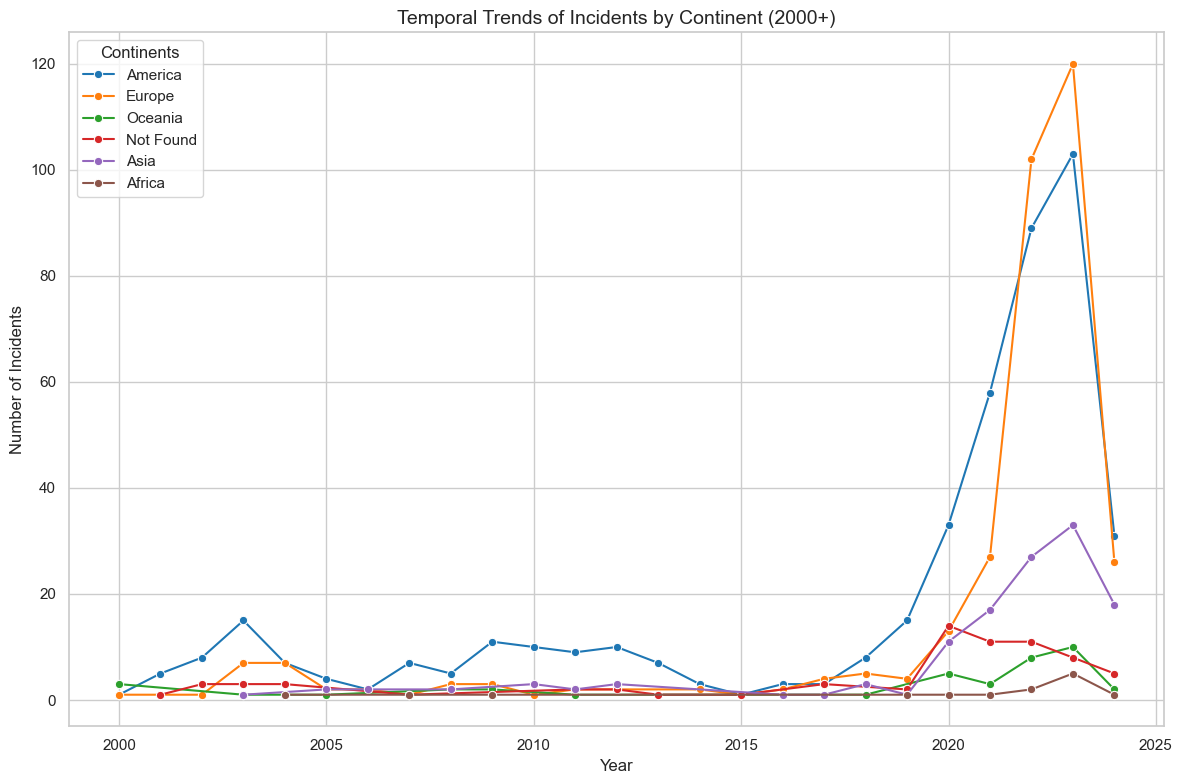

In [17]:
# Group by year and continents, counting incidents
temporal_data = df[df['year'] >= 2000].groupby(['year', 'continents']).size().reset_index(name='count')

# Plot the trends over years for each continent
plt.figure(figsize=(12, 8))
sns.lineplot(data=temporal_data, x='year', y='count', hue='continents', marker='o', palette='tab10')
plt.title('Temporal Trends of Incidents by Continent (2000+)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Continents')
plt.grid(True)
plt.tight_layout()
plt.show()

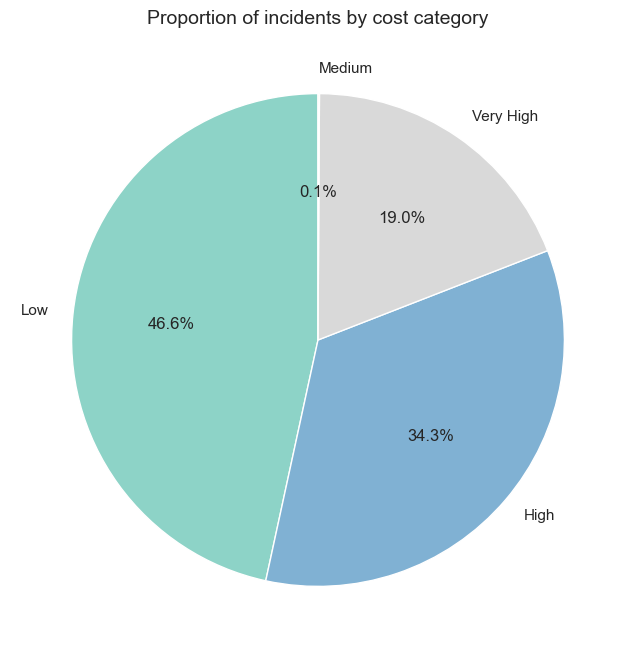

In [18]:
# Paso 4: Gráfico de pastel para mostrar el porcentaje de incidentes por categoría de costo
cost_category_counts = df['cost_category'].value_counts()

# Graficamos el pastel
plt.figure(figsize=(8, 8))
cost_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)

# Título
plt.title('Proportion of incidents by cost category', fontsize=14)
plt.ylabel('')  # Eliminamos la etiqueta del eje y

# Mostrar gráfico
plt.show()

CLUSTERING

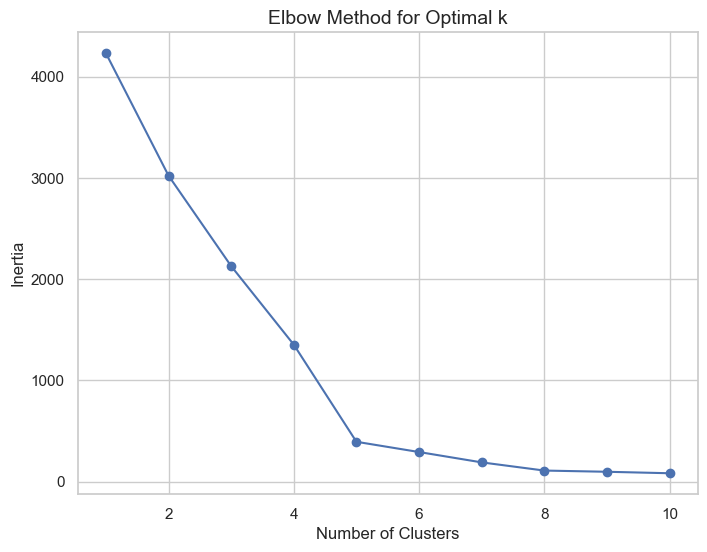

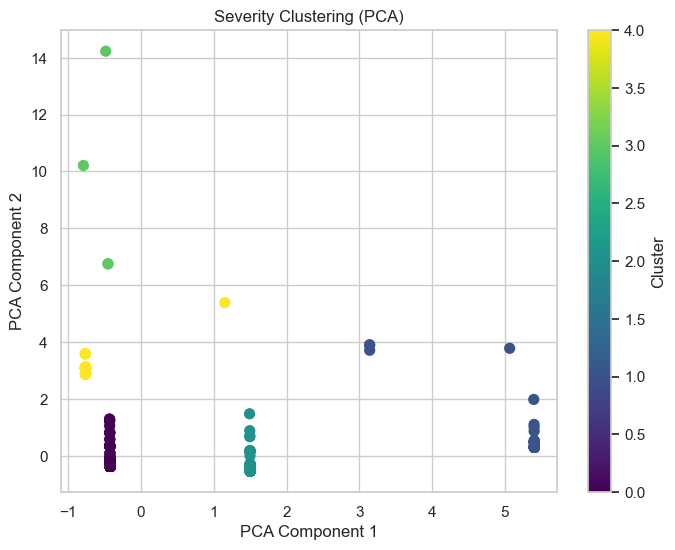

In [19]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['estimated_cost', 'IT', 'OT', 'Privacy']
df_cluster = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

from sklearn.cluster import KMeans

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with optimal k (e.g., k=3)
optimal_k = 3  # Adjust based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df_cluster['Cluster'] = clusters

# Apply K-Means with the optimal number of clusters
optimal_k = 5  # Adjust based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
df_cluster['Cluster'] = clusters

from sklearn.decomposition import PCA
import seaborn as sns

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['Cluster'], cmap='viridis', s=50)
plt.title('Severity Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

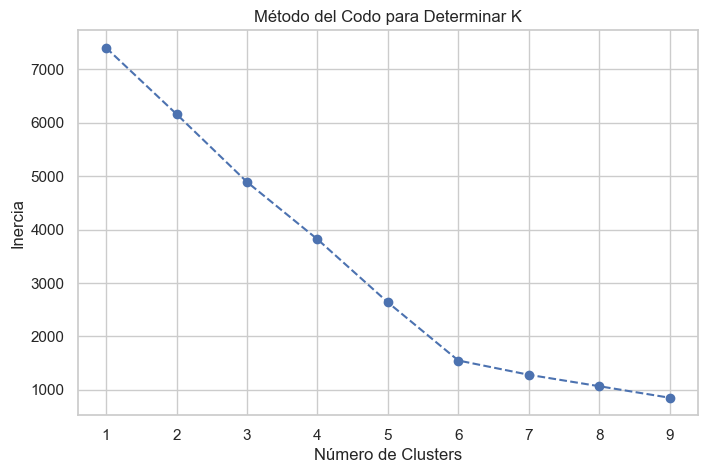

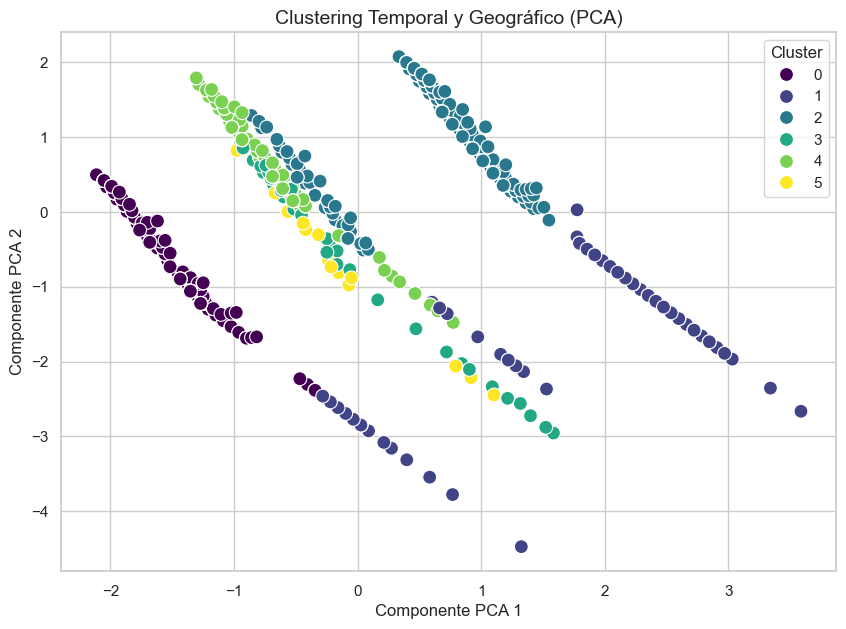

Centroides de los Clusters en el Espacio Original:
          year     month        Africa       America          Asia  \
0  2021.868590  5.759615  5.030698e-17 -1.665335e-16  0.000000e+00   
1  2005.191358  1.061728  2.428613e-17  7.098765e-01 -3.885781e-16   
2  2021.643392  6.458853  3.816392e-17  8.628429e-01 -2.081668e-16   
3  2016.619048  5.642857 -1.734723e-18 -5.551115e-17  0.000000e+00   
4  2020.448819  5.511811 -3.469447e-18 -1.110223e-16  1.000000e+00   
5  2018.785714  4.428571  1.000000e+00  0.000000e+00  1.387779e-17   

         Europe       Oceania  
0  1.000000e+00  3.469447e-17  
1  1.851852e-01 -9.020562e-17  
2 -6.106227e-16 -2.775558e-17  
3  1.110223e-16  1.000000e+00  
4  1.110223e-16 -6.938894e-18  
5  0.000000e+00  0.000000e+00  

Conteo de Incidentes por Cluster:
   Cluster  Count
0        2    401
1        0    312
2        1    162
3        4    127
4        3     42
5        5     14


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de las columnas para clustering
features = ['year', 'month', 'Africa', 'America', 'Asia', 'Europe', 'Oceania']
df_geo_clustering = df[features].dropna()

# Escalado de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_geo_clustering)

# Determinar el número óptimo de clusters con el método del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Aplicar K-Means con el número óptimo de clusters (ajustar K según el gráfico del codo)
optimal_k = 6 # Cambia según el resultado del gráfico
kmeans_geo = KMeans(n_clusters=optimal_k, random_state=42)
df_geo_clustering['Cluster'] = kmeans_geo.fit_predict(scaled_data)

# Visualizar clusters con PCA
pca = PCA(n_components=2)
reduced_geo = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=reduced_geo[:, 0],
    y=reduced_geo[:, 1],
    hue=df_geo_clustering['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clustering Temporal y Geográfico (PCA)', fontsize=14)
plt.xlabel('Componente PCA 1', fontsize=12)
plt.ylabel('Componente PCA 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Mostrar los centroides en el espacio de características originales
centroids = scaler.inverse_transform(kmeans_geo.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)

print("Centroides de los Clusters en el Espacio Original:")
print(centroids_df)

# Análisis adicional: Conteo de puntos por cluster
cluster_counts = df_geo_clustering['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
print("\nConteo de Incidentes por Cluster:")
print(cluster_counts)

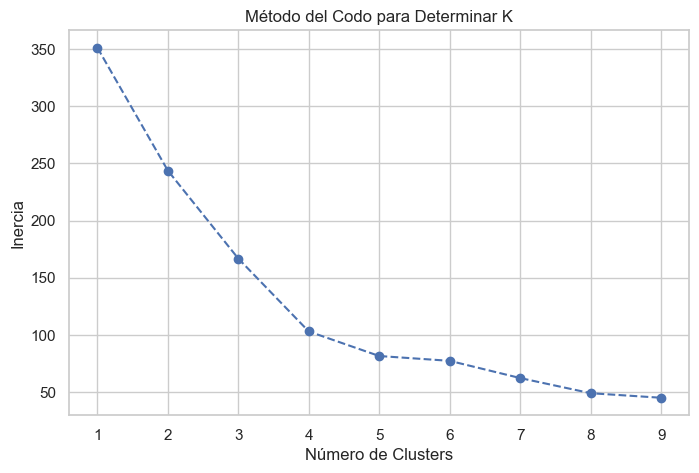

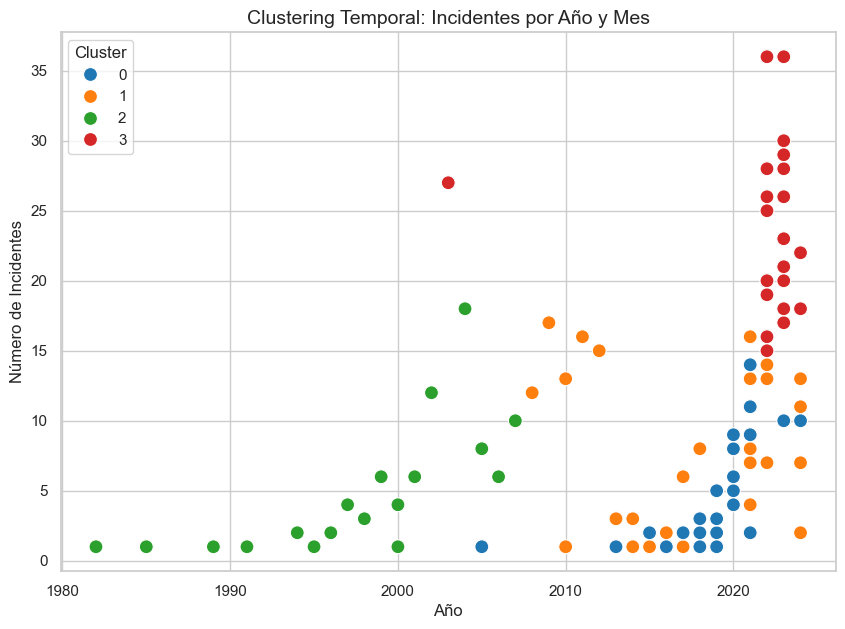

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Crear un DataFrame con número de incidentes por mes y año
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')  # Agrupación por año-mes

# Contar el número de incidentes por año y mes
incidents_per_month = df.groupby(['year', 'month']).size().reset_index(name='num_incidents')

# Paso 2: Selección de columnas para clustering
clustering_data = incidents_per_month[['year', 'month', 'num_incidents']]

# Paso 3: Escalar los datos
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Paso 4: Determinar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_clustering_data)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Paso 5: Aplicar K-Means con el número óptimo de clusters
optimal_k = 4  # Ajustar según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_clustering_data)

# Paso 6: Visualización de los Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=clustering_data['year'],
    y=clustering_data['num_incidents'],
    hue=clustering_data['Cluster'],
    palette='tab10',
    s=100
)
plt.title('Clustering Temporal: Incidentes por Año y Mes', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Incidentes', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Reporte de clasificación de KNN:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       254
           1       1.00      0.64      0.78        11
           2       0.94      0.90      0.92        51
           3       0.00      0.00      0.00         2

    accuracy                           0.97       318
   macro avg       0.73      0.63      0.67       318
weighted avg       0.96      0.97      0.96       318



C:\Users\sarad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sarad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sarad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

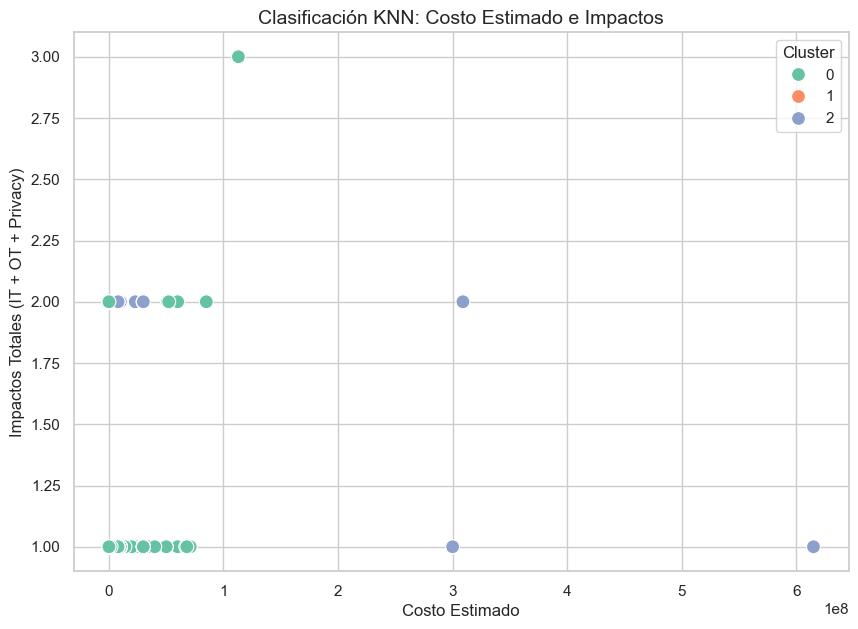

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Preprocesar los datos (seleccionar las características y eliminar NaN)
df_knn = df[['estimated_cost', 'IT', 'OT', 'Privacy']].dropna()

# Paso 2: Crear etiquetas para los clusters (usando KMeans para generar etiquetas)
from sklearn.cluster import KMeans

# Escalado de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_knn)

# Aplicar KMeans para crear etiquetas de clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Usamos 4 clusters como ejemplo
df_knn['Cluster'] = kmeans.fit_predict(scaled_data)

# Paso 3: Dividir los datos en conjunto de entrenamiento y prueba
X = df_knn[['estimated_cost', 'IT', 'OT', 'Privacy']]  # Características
y = df_knn['Cluster']  # Etiquetas (clusters generados por KMeans)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Aplicar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Definimos 5 vecinos
knn.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
y_pred = knn.predict(X_test)

# Mostrar el reporte de clasificación (precisión, recall, etc.)
print("Reporte de clasificación de KNN:")
print(classification_report(y_test, y_pred))

# Paso 6: Visualización de los resultados
# Aseguramos que los índices estén alineados correctamente para la visualización
df_knn['Predicted_Cluster'] = knn.predict(X)  # Usamos el modelo para predecir todos los datos

# Graficamos los resultados de KNN
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_knn['estimated_cost'],
    y=df_knn[['IT', 'OT', 'Privacy']].sum(axis=1),  # Suma de los impactos
    hue=df_knn['Predicted_Cluster'],  # Usamos la predicción del cluster
    palette='Set2',
    s=100
)
plt.title('Clasificación KNN: Costo Estimado e Impactos', fontsize=14)
plt.xlabel('Costo Estimado', fontsize=12)
plt.ylabel('Impactos Totales (IT + OT + Privacy)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Coeficientes del modelo: [ 2.63100166e+05  9.88772312e+05  1.95246428e+06  2.79396772e-09
 -1.56539604e+06 -5.26855002e+06 -1.52750980e+06 -5.08420972e+06
 -2.79873099e+06]
Intercepto: 8182393.29559892
Error cuadrático medio (MSE): 498941814719212.4
R^2: -0.010431638939435217


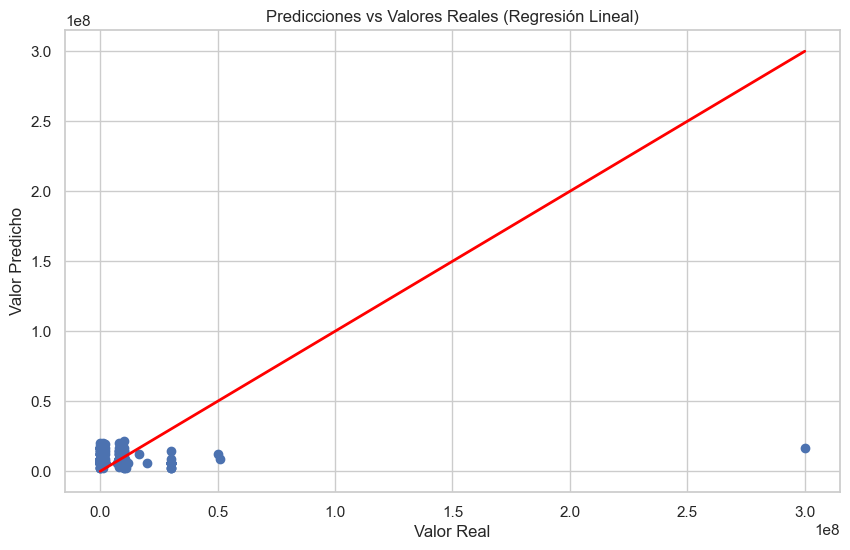

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Paso 1: Preprocesamiento de los datos
# Asegúrate de tener las columnas correctas y no nulas.
# Ejemplo de columnas que podrías usar para predecir el costo estimado
df = df.dropna(subset=['estimated_cost'])  # Elimina filas con valores nulos en estimated_cost

# Selecciona las características para el modelo (puedes elegir más según tu criterio)
features = ['IT', 'OT', 'Privacy', 'malware_title_encoded', 'Africa', 'America', 'Asia', 'Europe', 'Oceania']

# Variables independientes (X) y dependientes (y)
X = df[features]
y = df['estimated_cost']

# Escalado de características (opcional, pero recomendable para algunas variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Paso 4: Hacer predicciones
y_pred = regressor.predict(X_test)

# Paso 5: Evaluar el modelo
print("Coeficientes del modelo:", regressor.coef_)
print("Intercepto:", regressor.intercept_)

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# R-cuadrado
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Predicciones vs Valores Reales (Regresión Lineal)")
plt.show()